<a href="https://colab.research.google.com/github/LalitaSharkey/CS620_data_science/blob/master/Semester_Project%5CCS620_Sharkey_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Street Light Outage and Police Incident Reports in Norfolk
###BY LALITA SHARKEY UIN: 01063704

<img width= "35%;" src="https://wparch.com/wp-content/uploads/2019/01/GRANBY-STREET-LIGHTING-6.jpg">


#Abstract
This is the report for a semester data project for Introduction to Data Science and Analytics course. The purpose of this project was to experiment with the datasets using techniques learned from the class. There are two datasets used in this peoject. Both of them were taken from [City of Norfolk Open Data](https://data.norfolk.gov). The two datasets are the street light outage dataset and the Police Incident Reports dataset in Norfolk. The end goal of this project is to find the relationship between the street light outage and number of incidents that were reported to the police in Norfolk. However, there are possiblities of finding some other useful information once the datasets are carefully observed and explored. For example, The Street Light Outage dataset might reveal the factors that contribute to the functionality of the Street Lights using the prediction models. This project will also include a visualization of interactive Norfolk map plotted with the street light outage information and police incident reports.

#Initail Data Observation

###Data Source
1. The Street Light Outage data  
   *This dataset is updated monthly. The last update was on August 14, 2019.*  
   **URL:** https://data.norfolk.gov/api/views/r7bn-2egr/rows.csv?accessType=DOWNLOAD&bom=true&format=true  
   **Data Description(Direct quote from [City of Norfolk Open Data](https://data.norfolk.gov/api/views/5qpt-tdve/files/8bdf545a-cea8-4d92-a260-228f95786df4?download=true&filename=Norfolk%20Street%20Light%20&%20Outage%20Report%20-%20Information%20Worksheet.pdf)):**  
   Information regarding Dominion Energy owned (city leased) street light locations and types within the city of Norfolk and monthly reporting of street light outages throughout the city. The data is collected, updated, and maintained by Dominion Energy. The outages reported are those that have been reported by residents.  
   **Dataset  Fields(Direct quote from [City of Norfolk Open Data](https://data.norfolk.gov/api/views/5qpt-tdve/files/8a296874-b8bb-4c55-8347-ba352c96071a?download=true&filename=Norfolk%20Street%20Light%20&%20Outage%20Report%20-%20Dataset%20Fields.pdf)):**   
  - Grid Address – Indicates the pole ID (pole tag) of the streetlight  
  - Watts – The total amount of watts consumed by the streetlight  
  - Fixture Style – Denotes street light fixture style  
  - Decal Color – Indicates decal color (blue = mercury vapor, yellow = high pressure sodium)  
  - Decal Number – Indicates decal number, which includes the wattage in the numeric code
  - Bulb Type – Denotes bulb type (high pressure sodium, mercury vapor, LED)  
  - Usage – Indicates pole usage (Street Light Pole)  
  - Ownership – Denotes ownership of the streetlight (Dominion, City, or watch light)  
  - Bridge Indicator – Indicates if streetlight is located on a bridge  
  - Pole Material – Denotes construction material of the pole  
  - Lumens – Indicates units of lumens emitted by the streetlight  
  - Contract Number – Indicates contract number  
  - Location – The XY GPS coordinates of the light pole  
  - Date Reported – The time and date the initial light outage was reported  
  - Work Order Number – The unique ID number assigned to the work order  
  - Work Order Status – The status of the work order  
  - Reported By User – The identifier of street light outage reporter  
  - Resolution – The resolution of the street light outage if the work order status reports follow-up  
  - Number of Days Out – The number of days the street light has been out since initial reporting  
  
2. The Police Incident Reports  
    *This dataset is updated weekly.*  
    **URL:** https://data.norfolk.gov/api/views/5qpt-tdve/rows.csv?accessType=DOWNLOAD&bom=true&format=true  
    **Data Description(Direct quote from [City of Norfolk Open Data](https://data.norfolk.gov/api/views/r7bn-2egr/files/cf5072b0-decb-4f2b-9d0a-5ebc9f9051cf?download=true&filename=Data%20Information%20Worksheet%20-%20Incident%20Reports.pdf)):**  
    This dataset is incident reports recorded by Norfolk Police Department that occurred over the last five years. An incident is considered an event that has been reported to the Police; it does not necessarily indicate a crime has occurred. This dataset will enable citizens to search incidents by type, location, date
and time of occurrence.   
    **Dataset  Fields(Direct quote from [City of Norfolk Open Data](https://data.norfolk.gov/api/views/r7bn-2egr/files/6920cf69-2b7f-4719-959d-111a20354d24?download=true&filename=Dataset%20Fields%20-%20Incident%20Reports.pdf)):**  
      - Incident ID – Denotes the incident number of the offense  
      - Offense – Denotes a defined offense over which the police have jurisdiction  
      - Block Address – Denotes the block number where the offense occurred  
      - Street – Denotes the street name of the address where the offense occurred  
      - Date – Denotes the date of the occurrence of the offense  
      - Hour – Denotes the hour of the occurrence of the offense  
      - Tract – Denotes the City of Norfolk planning district tract where the offense occurred       
      - Zone – Denotes the City of Norfolk police car district where the offense occurred  
    

###Import Python libraries and datasets

In [0]:
#import needed Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
incident_data = pd.read_csv('https://data.norfolk.gov/api/views/r7bn-2egr/rows.csv?accessType=DOWNLOAD&bom=true&format=true')

In [0]:
light_data = pd.read_csv('https://data.norfolk.gov/api/views/5qpt-tdve/rows.csv?accessType=DOWNLOAD&bom=true&format=true')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,14,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


***NOTE:***  
Accoridng to the above message, it indicates that the Street Light Outage Dataset contains some broke data which means there are columns with mixed data type. This issue can be solved by specifying the data type. Although setting `dtype=object` will surpress the above message but it does not help with memory efficiency.

###Police Incident Reports data  
There are a few techniques that were used in order to do the initail data observation.

**1. Observe the first few rows of the dataset**

In [0]:
incident_data.head()

,Incident ID,Offense,Block Address,Street,Date of Occurrence,Hour of Occurrence,Tract,Zone,District,Report Area,Day of the Week,Neighborhood
0,1.909260e+11,DUMPING TRASH,8500,OLD OCEAN VIEW RD,09/26/2019,37.0,NaN,NaN,NaN,NaN,TH,NaN
1,1.909260e+11,VANDALISM,6000,E VIRGINIA BEACH BLVD,09/25/2019,2326.0,NaN,NaN,NaN,NaN,WE,NaN
2,1.909250e+11,NARCOTIC VIOLATIONS,1800,BARRE ST,09/25/2019,16.0,NaN,NaN,NaN,NaN,WE,NaN
3,1.909250e+11,LARCENY (All others),3200,BREST AVE,09/25/2019,130.0,NaN,NaN,NaN,NaN,WE,NaN
4,1.909250e+11,SHOPLIFTING & CONCEALMENT,800,BOUSH ST,09/25/2019,308.0,NaN,NaN,NaN,NaN,WE,NaN


According to the abov result, there seems to be many missing values. Also the "Incident ID" looks like it is in scientic number format. It might require some cleaning.

In [0]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145036 entries, 0 to 145035
Data columns (total 12 columns):
Incident ID           145030 non-null float64
Offense               145036 non-null object
Block Address         145036 non-null int64
Street                144982 non-null object
Date of Occurrence    145034 non-null object
Hour of Occurrence    143650 non-null float64
Tract                 72425 non-null object
Zone                  110167 non-null object
District              74604 non-null object
Report Area           74420 non-null object
Day of the Week       142432 non-null object
Neighborhood          108173 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 13.3+ MB


Text(0.5, 1.0, 'Missing value location accroding to index for Police Incident Reports')

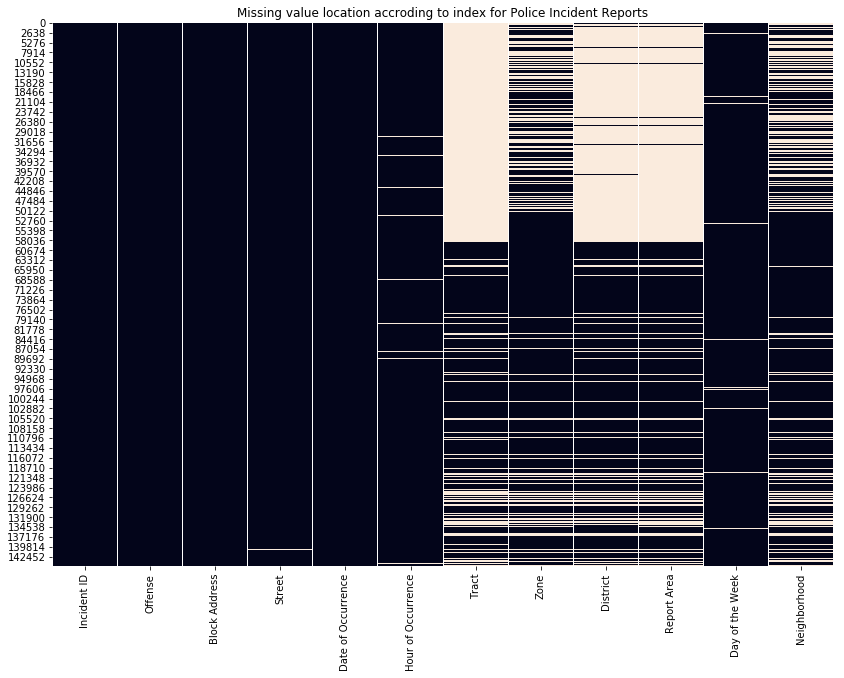

In [0]:
#Observing missing values
plt.figure(figsize=(14, 10))
sns.heatmap(incident_data.isnull(), cbar=False).set_title('Missing value location accroding to index for Police Incident Reports')

###Street Lights and Outages Reports data

In [0]:
light_data.head()

,Grid Address,Watts,Fixture Style,Decal Color,Decal Number,Bulb Type,Usage,Ownership,First on Pole,Bridge Indicator,Pole Material,Pole Style,Lumens,Location,Street Address,Work Order Number,Work Order Status,Entered Date,Entered By User,Resolution,Number of Days Out
0,N0417TH3300,150,Enclosed Unit,Yellow (High Pressure Sodium),15,High Pressure Sodium,Street Light,NaN,YES,NO,Wood,Standard,"14,000","(36.8644382, -76.30006527)",NaN,32312718.0,Follow-up,07/03/2019 12:00:00 AM,norfolkcares,REPAIR LIGHT CONDUCTOR-UG,41.0
1,N0417TL8200,100,Enclosed Unit,Yellow (High Pressure Sodium),10,High Pressure Sodium,Street Light,NaN,YES,NO,Wood,Standard,"8,000","(36.86975129, -76.29938259)",NaN,32312946.0,Follow-up,07/03/2019 12:00:00 AM,Dominion,RPL SV ENC HEAD -70 WATT-FLAT,41.0
2,N0717ED6200,70,Enclosed Flat Lens Unit,Yellow (High Pressure Sodium),7,High Pressure Sodium,Street Light,Dominion Energy,YES,NO,Wood,Standard,"5,000","(36.85878986, -76.1999672)",NaN,32318546.0,Follow-up,07/08/2019 12:00:00 AM,norfolkcares,RPL SV ENC HEAD -70 WATT-FLAT,36.0
3,N0417TE9100,100,Traditional,Yellow (High Pressure Sodium),10,High Pressure Sodium,Street Light,Dominion Energy,YES,NO,Concrete,Standard,"8,000","(36.85994708, -76.29926455)",NaN,32321629.0,Follow-up,07/10/2019 12:00:00 AM,Dominion,REPAIR LIGHT CONDUCTOR-UG,34.0
4,N0517QF1100,100,Enclosed Unit,Yellow (High Pressure Sodium),10,High Pressure Sodium,Street Light,Dominion Energy,YES,NO,Wood,Standard,"8,000","(36.86158392, -76.26363968)",NaN,32322199.0,Follow-up,07/10/2019 12:00:00 AM,norfolkcares,RPL SV ENC HEAD-100 WATT-FLAT,34.0


In [0]:
light_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32786 entries, 0 to 32785
Data columns (total 21 columns):
Grid Address          32786 non-null object
Watts                 32786 non-null object
Fixture Style         32786 non-null object
Decal Color           32785 non-null object
Decal Number          32785 non-null object
Bulb Type             32786 non-null object
Usage                 32786 non-null object
Ownership             18153 non-null object
First on Pole         32786 non-null object
Bridge Indicator      32786 non-null object
Pole Material         32786 non-null object
Pole Style            32786 non-null object
Lumens                32786 non-null object
Location              32786 non-null object
Street Address        120 non-null object
Work Order Number     50 non-null float64
Work Order Status     50 non-null object
Entered Date          50 non-null object
Entered By User       50 non-null object
Resolution            49 non-null object
Number of Days Out    50 no

Text(0.5, 1.0, 'Missing value location accroding to index for Street Lights and Outages Reports')

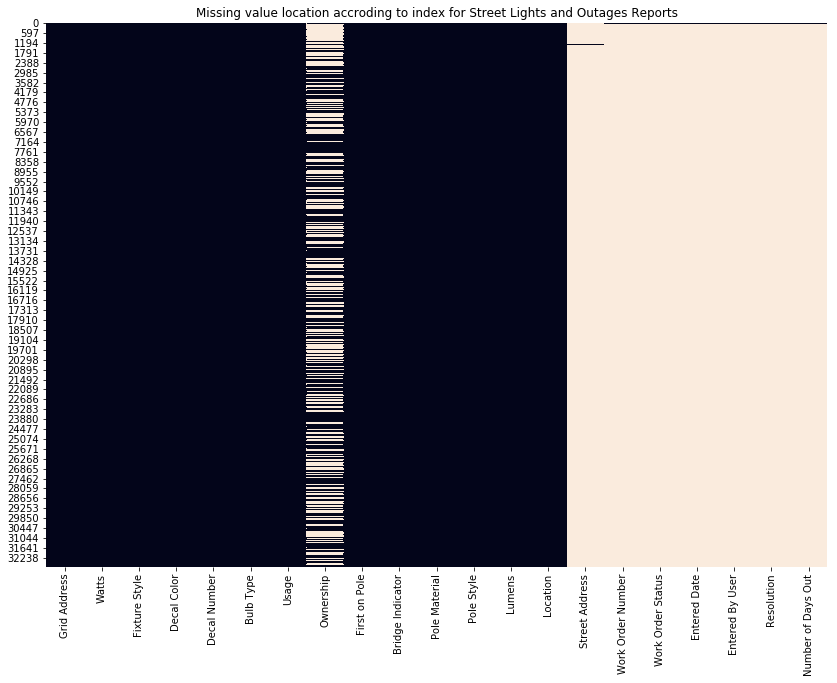

In [0]:
#Observing missing values
plt.figure(figsize=(14, 10))
sns.heatmap(light_data.isnull(), cbar=False).set_title('Missing value location accroding to index for Street Lights and Outages Reports')